In [1306]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1. Loading and reading our raw dataset

In [1307]:
# loading our csv input data as a data frame
df = pd.read_csv("data-input.csv")

In [1308]:
# outputting the top 5 elements
df.head()

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,"$572,754",2.40%,"$13,673",1.20%,"$244,860","$409,795",-,"2,300,000"
1,2,Amazon,"$469,822",21.70%,"$33,364",56.40%,"$420,549","$1,658,807.30",-,"1,608,000"
2,3,Apple,"$365,817",33.30%,"$94,680",64.90%,"$351,002","$2,849,537.60",-,"154,000"
3,4,CVS Health,"$292,111",8.70%,"$7,910",10.20%,"$232,999","$132,839.20",-,"258,000"
4,5,UnitedHealth Group,"$287,597",11.80%,"$17,285",12.20%,"$212,206","$479,830.30",-,"350,000"


In [1309]:
# outputting the bottom 5 elements
df.tail()

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
995,996,Vizio Holding,"$2,124",4%,($39.40),-138.40%,$935.80,"$1,705.10",-,800
996,997,1-800-Flowers.com,"$2,122.20",42.50%,$118.70,101.10%,"$1,076.70",$830,-,"4,800"
997,998,Cowen,"$2,112.80",30.20%,$295.60,36.60%,"$8,748.80",$744.10,-,"1,534"
998,999,Ashland Global Holdings,"$2,111",-11.20%,$220,-,"$6,612","$5,601.90",-130,"4,100"
999,"1,000",DocuSign,"$2,107.20",45%,($70),-,"$2,541.30","$21,302.80",-,"7,461"


## 2. Cleaning our raw dataset

In [1310]:
# finding rows that have missing values(null entry) for at least one of the columns.
df[df.isna().any(axis=1)]

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees


In [1311]:
# observation: string "-" is used to emulate missing value in this dataset
df[df["profits"] == "-"]

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
498,499,Frontier Communications,"$6,411",-10.40%,-,-,"$16,481","$6,763.10",-97,"15,640"
534,535,Chesapeake Energy,"$5,809",11.50%,-,-,"$11,009","$11,135.90",-22,"1,300"
735,736,Garrett Motion,"$3,633",19.70%,-,-,"$2,706",$463.90,7,"7,600"


In [1312]:
# removing all rows with at least one missing entry "-"
# not removing "-" entries for column change_in_rank bc that means the 
# rank didn't change.
myList = list(df)

for col in myList:
    if col != "change_in_rank":
        df = df[df[col] != '-']

In [1313]:
# after data cleaning, we can observe that we are left with 654 rows instead of 1000
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,"$572,754",2.40%,"$13,673",1.20%,"$244,860","$409,795",-,"2,300,000"
1,2,Amazon,"$469,822",21.70%,"$33,364",56.40%,"$420,549","$1,658,807.30",-,"1,608,000"
2,3,Apple,"$365,817",33.30%,"$94,680",64.90%,"$351,002","$2,849,537.60",-,"154,000"
3,4,CVS Health,"$292,111",8.70%,"$7,910",10.20%,"$232,999","$132,839.20",-,"258,000"
4,5,UnitedHealth Group,"$287,597",11.80%,"$17,285",12.20%,"$212,206","$479,830.30",-,"350,000"
...,...,...,...,...,...,...,...,...,...,...
991,992,Beazer Homes USA,"$2,140.30",0.60%,$122,133.60%,"$2,078.80",$478.80,-61,"1,052"
992,993,Chemed,"$2,139.30",2.90%,$268.60,-15.90%,"$1,342.70","$7,592.50",-49,"14,137"
995,996,Vizio Holding,"$2,124",4%,($39.40),-138.40%,$935.80,"$1,705.10",-,800
996,997,1-800-Flowers.com,"$2,122.20",42.50%,$118.70,101.10%,"$1,076.70",$830,-,"4,800"


In [1314]:
# removing '$' and ',' and '%' and '(' and ')' from values
# changing data types from string to either int or float depending on whats suitable
for col in myList:
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].str.replace('%', '')
    df[col] = df[col].str.replace('(', '-')
    df[col] = df[col].str.replace(')', '')
    if((col == 'employees')):
        df[col] = df[col].astype("int")
    elif((col != 'change_in_rank') & (col != "rank") & (col != "name")):
        df[col] = df[col].astype("float")

In [1315]:
# adding a "Profited" column that indicates if a company profited.
# (this column will be useful in our machine learning portion)
df["profited"] = df["profits"] > 0 

df["profited"] = df["profited"].replace(True, 1);
df["profited"] = df["profited"].replace(False, 0);

In [1316]:
# adding a "rank_change" column that indicates if a company's rank changed
# from the previous year or not.
# (this column will be useful in our machine learning portion)
df["rank_change"] = df["change_in_rank"].str.contains('-', regex=True)
df["rank_change"] = df["rank_change"].replace(True, 1);
df["rank_change"] = df["rank_change"].replace(False, 0);

In [1317]:
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees,profited,rank_change
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,-,2300000,1,1
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,-,1608000,1,1
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,-,154000,1,1
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,-,258000,1,1
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,-,350000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
991,992,Beazer Homes USA,2140.3,0.6,122.0,133.6,2078.8,478.8,-61,1052,1,1
992,993,Chemed,2139.3,2.9,268.6,-15.9,1342.7,7592.5,-49,14137,1,1
995,996,Vizio Holding,2124.0,4.0,-39.4,-138.4,935.8,1705.1,-,800,0,1
996,997,1-800-Flowers.com,2122.2,42.5,118.7,101.1,1076.7,830.0,-,4800,1,1


In [1318]:
# saving the clean version of our dataset
df.to_csv("data-cleaned.csv")

## 3. Visualizations

### Visualization 1: Revenues of the top 15 highest earning companies.

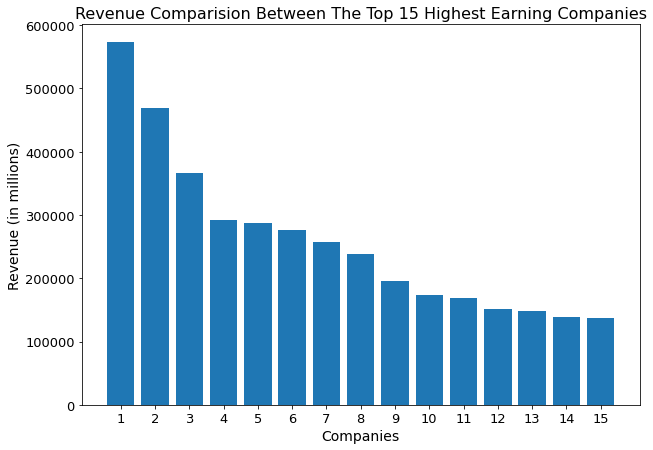

In [1326]:
topFifteenDf = df.head(15)

# # setting height & width
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

barGraph = plt.bar(range(1,16), topFifteenDf["revenues"])
plt.xticks(range(1,16))
plt.xlabel("Companies")
plt.ylabel("Revenue (in millions)")
plt.title("Revenue Comparision Between The Top 15 Highest Earning Companies")

# setting font sizes
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)    
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)

plt.savefig('plot1.jpg', bbox_inches='tight')
plt.show()

### Visualization 2: Relationship between Company Revenue & Market Value

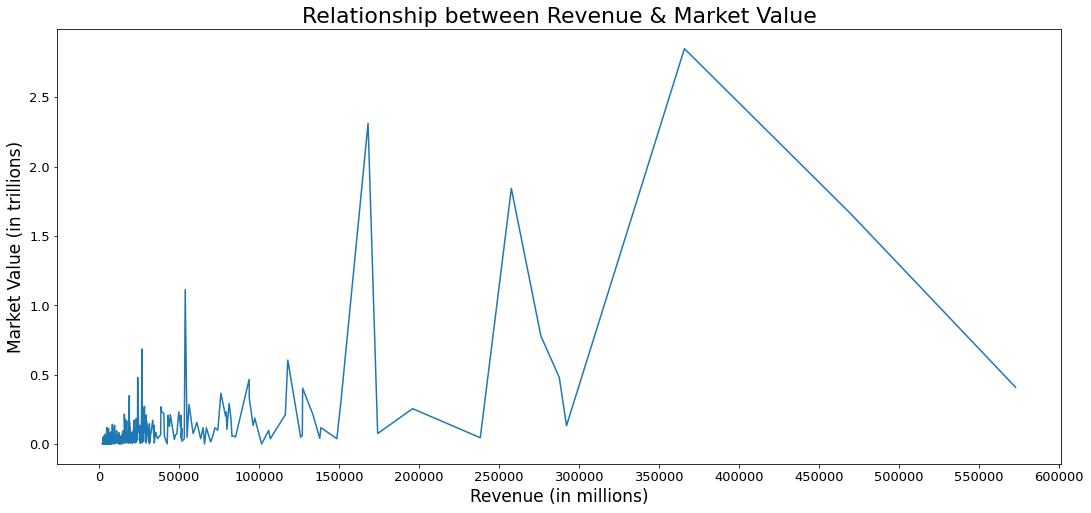

In [1324]:
# setting height & width
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(8)

plt.plot(df["revenues"], df["market_value"]/10**6)

plt.xticks(np.arange(0, 600001, 50000))
plt.xlabel("Revenue (in millions)")
plt.ylabel("Market Value (in trillions)")
plt.title("Relationship between Revenue & Market Value")

# setting font sizes
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=17)    
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)

plt.savefig('plot2.jpg')
plt.show()

### Visualization 3: Relationship between Company Profits & Number of Employees

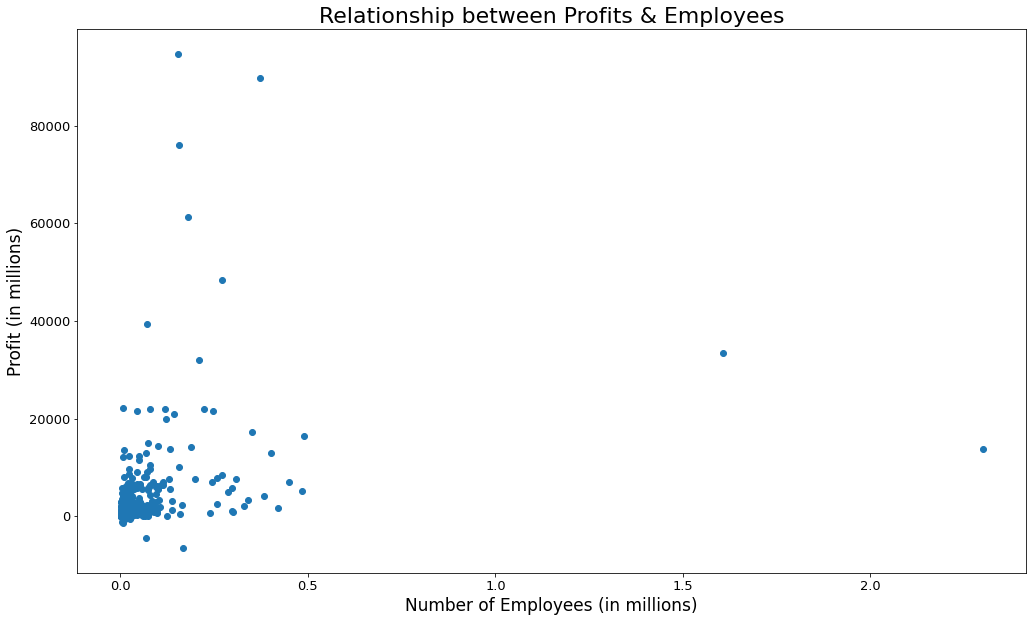

In [1323]:
# setting height & width
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(10)

plt.xlabel("Number of Employees (in millions)")
plt.ylabel("Profit (in millions)")
plt.title("Relationship between Profits & Employees")

plt.scatter(df["employees"]/10**6, df["profits"])

plt.savefig('plot3.jpg')
plt.show()